# Install and Import Dependencies

In [38]:
!pip install easyocr
!pip install imutils

# Read in Image, Grayscale and blur

In [38]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

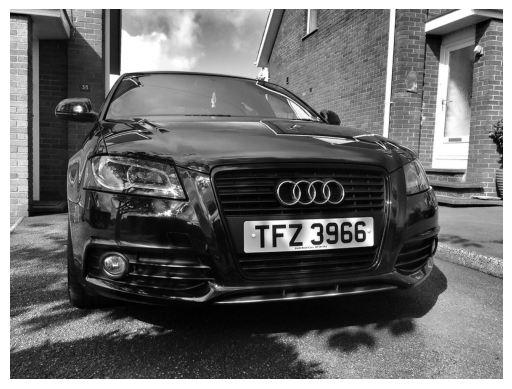

In [39]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r"C:\Users\SYSTEK\Downloads\image6.jpg")
# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale image
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()


# Apply filter and find edges for localization

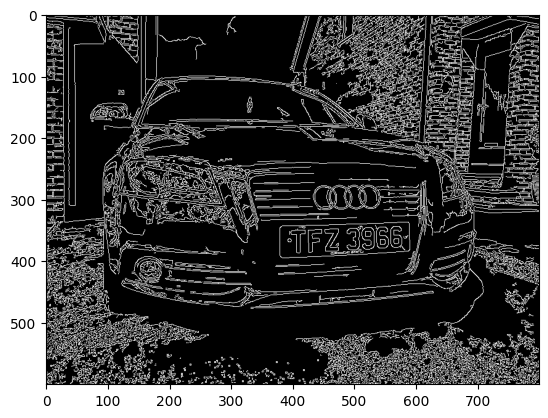

In [40]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Find Contours and Apply Mask

In [41]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [42]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [43]:
location

array([[[589, 339]],

       [[383, 343]],

       [[379, 391]],

       [[588, 384]]], dtype=int32)

In [44]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

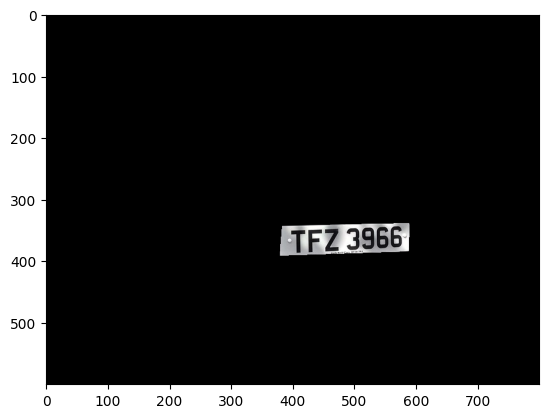

In [45]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [46]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


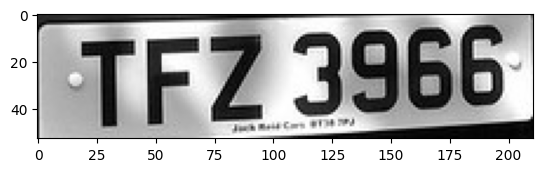

In [47]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Use Easy OCR to read text

In [48]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[13, 0], [211, 0], [211, 53], [13, 53]], 'TFZ 3966', 0.5378662297441392)]

# Results

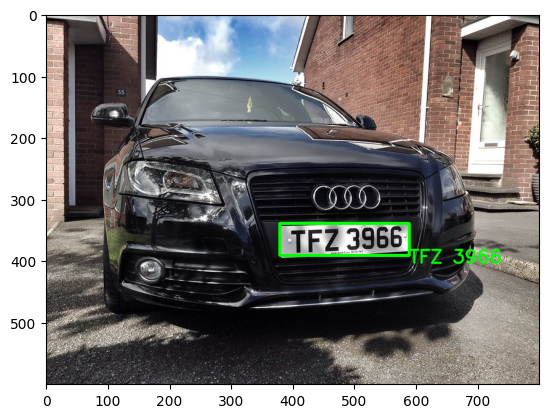

In [49]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))